<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 GOOGLE Analysis
  </h1>
</div>

In [98]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [99]:
import warnings
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [100]:
warnings.filterwarnings("ignore")

In [101]:
# variable
TICKER= 'GOOG'

In [102]:
#paths
RAW_DATA_PATH='../../data/raw/yfinance_data/'+TICKER+'_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/'+TICKER+'_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [103]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/GOOG_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (5020, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


### Dataset Overview

In [104]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2472,2014-06-16,27.387808,27.405758,27.001865,27.139488,27.108641,34051232,0.0,0.0
974,2008-07-02,13.362663,13.459052,13.102389,13.126798,13.111876,169553154,0.0,0.0
3412,2018-03-09,56.799999,58.040001,56.623051,58.001999,57.936069,42560000,0.0,0.0
1015,2008-08-29,11.699896,11.731278,11.515089,11.538999,11.525883,154504960,0.0,0.0
2997,2016-07-15,36.286499,36.286999,35.952751,35.992500,35.951588,25586000,0.0,0.0
2311,2013-10-23,24.931549,25.772150,24.922335,25.688961,25.659761,106927293,0.0,0.0
2543,2014-09-25,29.297066,29.318506,28.630396,28.674274,28.641682,38519466,0.0,0.0
423,2006-04-25,10.949708,10.984826,10.610230,10.639122,10.627028,384194678,0.0,0.0
858,2008-01-16,15.665532,15.940003,14.992056,15.341247,15.323809,423983259,0.0,0.0
2955,2016-05-16,35.456501,35.924000,35.282501,35.824501,35.783779,26342000,0.0,0.0


In [105]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0
5019,2024-07-30,171.830002,172.949997,170.119995,171.860001,171.860001,13681400,0.0,0.0


In [106]:
#shape of the dataset
df.shape

(5020, 9)

In [107]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [108]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5020.0,4.525132e+01,4.333864e+01,2.470490,1.303470e+01,2.698221e+01,6.021513e+01,1.917500e+02
High,5020.0,4.572879e+01,4.381830e+01,2.534002,1.314542e+01,2.719490e+01,6.075838e+01,1.933100e+02
Low,5020.0,4.480059e+01,4.291817e+01,2.390042,1.288159e+01,2.679139e+01,5.981181e+01,1.906200e+02
Close,5020.0,4.527451e+01,4.337730e+01,2.490913,1.303209e+01,2.700593e+01,6.028025e+01,1.926600e+02
Adj Close,5020.0,4.522449e+01,4.333253e+01,2.488082,1.301728e+01,2.697523e+01,6.021173e+01,1.926600e+02
Volume,5020.0,1.157539e+08,1.497936e+08,158434.000000,2.733950e+07,5.585480e+07,1.425333e+08,1.650833e+09
Dividends,5020.0,3.984064e-05,2.822787e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01
Stock Splits,5020.0,4.582619e-03,2.840335e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


In [109]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,5020,5020,2004-08-19,1


In [110]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-null   float64
 4   Close         5020 non-null   float64
 5   Adj Close     5020 non-null   float64
 6   Volume        5020 non-null   int64  
 7   Dividends     5020 non-null   float64
 8   Stock Splits  5020 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 353.1+ KB


In [111]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            5020
Close           4923
Adj Close       4923
Volume          4907
Low             4904
High            4869
Open            4865
Stock Splits       4
Dividends          2
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [112]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [113]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [114]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [115]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [116]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [117]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [118]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [119]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 5020/5020 (0 became NaT)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          5020 non-null   datetime64[ns, UTC]
 1   Open          5020 non-null   float64            
 2   High          5020 non-null   float64            
 3   Low           5020 non-null   float64            
 4   Close         5020 non-null   float64            
 5   Adj Close     5020 non-null   float64            
 6   Volume        5020 non-null   int64              
 7   Dividends     5020 non-null   float64            
 8   Stock Splits  5020 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 353.1 KB


In [121]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [122]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
490,2006-07-31 00:00:00+00:00,9.663778,9.692919,9.546966,9.628908,9.617964,184500973,0.0,0.0
1010,2008-08-22 00:00:00+00:00,12.241615,12.325800,12.191304,12.218950,12.205062,92232419,0.0,0.0
4381,2022-01-12 00:00:00+00:00,141.554504,142.814255,141.112000,141.647995,141.486984,23642000,0.0,0.0
144,2005-03-16 00:00:00+00:00,4.401004,4.448576,4.358912,4.373607,4.368636,285317446,0.0,0.0
2011,2012-08-13 00:00:00+00:00,16.125059,16.442122,16.106628,16.438635,16.419950,131205956,0.0,0.0
420,2006-04-20 00:00:00+00:00,10.236880,10.361164,10.166892,10.336257,10.324508,492699864,0.0,0.0
1392,2010-03-02 00:00:00+00:00,13.337010,13.590559,13.325303,13.475989,13.460671,174925214,0.0,0.0
3343,2017-11-28 00:00:00+00:00,52.754501,53.118752,52.000000,52.370499,52.310970,28488000,0.0,0.0
3357,2017-12-18 00:00:00+00:00,53.304001,53.924500,53.099998,53.856998,53.795780,31092000,0.0,0.0
1490,2010-07-21 00:00:00+00:00,12.054816,12.097157,11.841366,11.892922,11.879404,131675710,0.0,0.0


In [123]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [124]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19 00:00:00+00:00,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20 00:00:00+00:00,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23 00:00:00+00:00,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24 00:00:00+00:00,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25 00:00:00+00:00,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5015,2024-07-24 00:00:00+00:00,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0
5016,2024-07-25 00:00:00+00:00,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0
5017,2024-07-26 00:00:00+00:00,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0
5018,2024-07-29 00:00:00+00:00,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0


In [125]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [126]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      Open      High       Low     Close  \
0 2004-08-19 00:00:00+00:00  2.490664  2.591785  2.390042  2.499133   
1 2004-08-20 00:00:00+00:00  2.515820  2.716817  2.503118  2.697639   
2 2004-08-23 00:00:00+00:00  2.758411  2.826406  2.716070  2.724787   
3 2004-08-24 00:00:00+00:00  2.770615  2.779581  2.579581  2.611960   
4 2004-08-25 00:00:00+00:00  2.614201  2.689918  2.587302  2.640104   

   Adj Close     Volume  Dividends  Stock Splits  
0   2.496292  897427216        0.0           0.0  
1   2.694573  458857488        0.0           0.0  
2   2.721690  366857939        0.0           0.0  
3   2.608991  306396159        0.0           0.0  
4   2.637103  184645512        0.0           0.0  


In [127]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi     Volume  trend_macd
0 2004-08-19 00:00:00+00:00  2.499133           NaN  897427216         NaN
1 2004-08-20 00:00:00+00:00  2.697639           NaN  458857488         NaN
2 2004-08-23 00:00:00+00:00  2.724787           NaN  366857939         NaN
3 2004-08-24 00:00:00+00:00  2.611960           NaN  306396159         NaN
4 2004-08-25 00:00:00+00:00  2.640104           NaN  184645512         NaN


{'Cumulative Return': 62.70756107222469, 'Annualized Volatility': 0.3066668478935509, 'Sharpe Ratio': 0.7799639563337155, 'Max Drawdown': -0.6529476078105549, 'Calmar Ratio': 96.03766109580197}


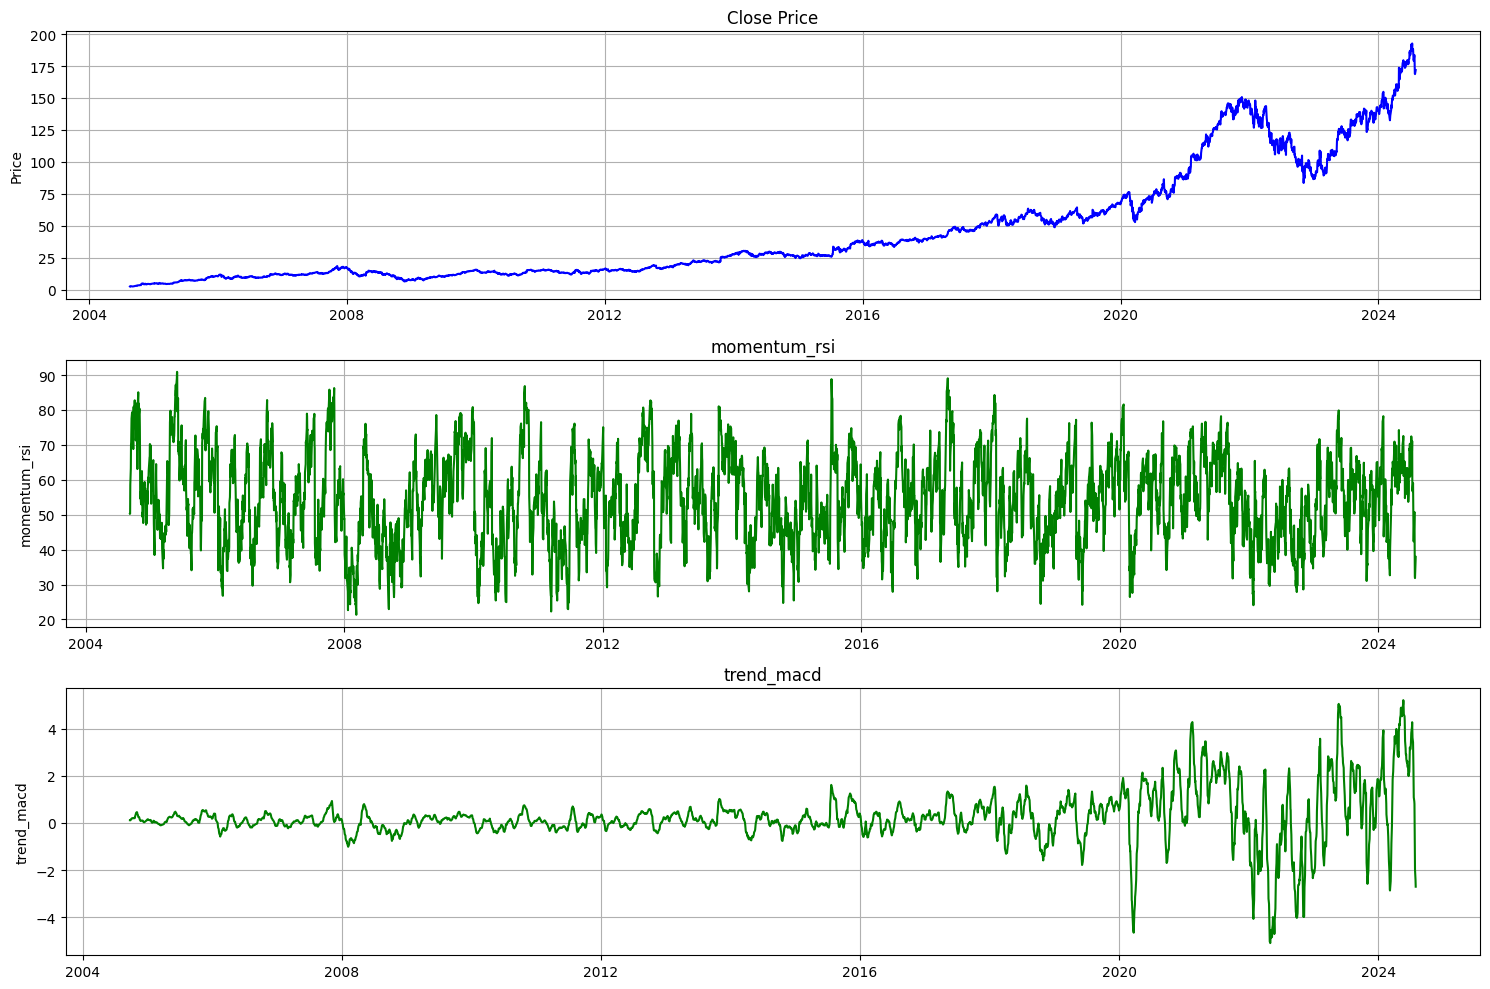

In [128]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()